Comp 4437 - Homework 1
Tahsin Berk Öztekin - 21070001035

1.Standard normalization by vectorization:

In [6]:
import numpy as np
def stdnorm(X):
    return (X - np.mean(X, axis=0, keepdims=True)) / np.std(X, axis=0, keepdims=True)
N = 10
D = 3
x_org = np.arange(1, N+1).reshape(N,1) @ np.arange(1, D+1).reshape(1,D)
print(x_org)
x_org = np.arange(1, N+1)[:,np.newaxis] * np.arange(1, D+1)
print(x_org.shape)
print(x_org)
x_norm = stdnorm(x_org)
print(x_norm)
print('Mean:', np.mean(x_norm, axis=0))
print('Std:', np.std(x_norm, axis=0))


[[ 1  2  3]
 [ 2  4  6]
 [ 3  6  9]
 [ 4  8 12]
 [ 5 10 15]
 [ 6 12 18]
 [ 7 14 21]
 [ 8 16 24]
 [ 9 18 27]
 [10 20 30]]
(10, 3)
[[ 1  2  3]
 [ 2  4  6]
 [ 3  6  9]
 [ 4  8 12]
 [ 5 10 15]
 [ 6 12 18]
 [ 7 14 21]
 [ 8 16 24]
 [ 9 18 27]
 [10 20 30]]
[[-1.5666989  -1.5666989  -1.5666989 ]
 [-1.21854359 -1.21854359 -1.21854359]
 [-0.87038828 -0.87038828 -0.87038828]
 [-0.52223297 -0.52223297 -0.52223297]
 [-0.17407766 -0.17407766 -0.17407766]
 [ 0.17407766  0.17407766  0.17407766]
 [ 0.52223297  0.52223297  0.52223297]
 [ 0.87038828  0.87038828  0.87038828]
 [ 1.21854359  1.21854359  1.21854359]
 [ 1.5666989   1.5666989   1.5666989 ]]
Mean: [-1.11022302e-16 -1.11022302e-16 -1.11022302e-16]
Std: [1. 1. 1.]


2. The XOR problem. Design and train a neural network with the minimum number of
neurons that predicts XOR outputs with 100% accuracy. If you use more neurons than the minimum
number you get 5 points less. You must clearly show that your model works. Create the XOR dataset
yourself. You are free to apply any learning method (shortly explain what you apply), but you MUST
use only numpy for the computations. No other package is allowed for the computations, you can use
other packages only for visualization or reporting.


[[0.]
 [1.]
 [1.]
 [0.]]
0.0012326320428425474


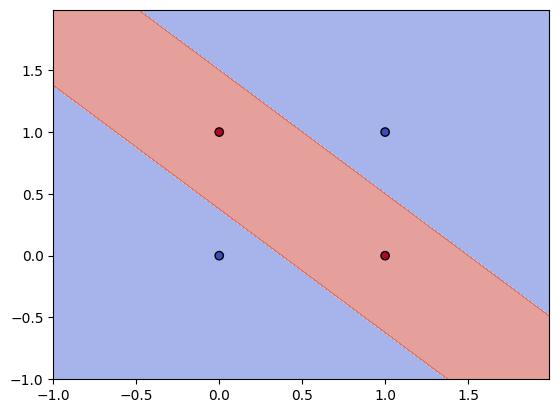

In [7]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x) 

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x <= 0, 0, 1)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - x ** 2

def softmax(x):
    exps = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exps / np.sum(exps, axis=-1, keepdims=True)

def cross_entropy_loss(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred)) 

def cross_entropy_loss_derivative(y_true, y_pred):
    return y_pred - y_true

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_loss_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true)

def plot_decision_boundary(X, y, model, h=0.01):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.show()

class NeuralNetwork:
    def __init__(self, layers, activation, loss, loss_derivative):
        self.layers = layers
        self.activation = activation
        self.loss = loss
        self.loss_derivative = loss_derivative
        self.weights = [np.random.randn(layers[i], layers[i+1]) for i in range(len(layers)-1)]
        self.biases = [np.random.randn(1, layers[i+1]) for i in range(len(layers)-1)]
        self.activations = {
            'sigmoid': (sigmoid, sigmoid_derivative),
            'relu': (relu, relu_derivative),
            'tanh': (tanh, tanh_derivative),
            'softmax': (softmax, None)
        }

    
    def forward(self, X):
        self.z = []
        self.a = [X]
        for i in range(len(self.layers)-1):
            self.z.append(np.dot(self.a[i], self.weights[i]) + self.biases[i])
            self.a.append(self.activations[self.activation][0](self.z[i]))
        return self.a[-1]
    
    def backward(self, X, y, lr):
        deltas = [self.loss_derivative(y, self.a[-1]) * self.activations[self.activation][1](self.a[-1])]
        for i in range(len(self.layers)-2, 0, -1):
            deltas.append(np.dot(deltas[-1], self.weights[i].T) * self.activations[self.activation][1](self.a[i]))
        deltas = deltas[::-1]
        for i in range(len(self.layers)-1):
            self.weights[i] -= lr * np.dot(self.a[i].T, deltas[i])
            self.biases[i] -= lr * np.sum(deltas[i], axis=0, keepdims=True)
    
    def fit(self, X, y, epochs=1000, lr=0.01):
        for _ in range(epochs):
            self.forward(X)
            self.backward(X, y, lr)
    
    def predict(self, X):
        return np.round(self.forward(X))
    
    def evaluate(self, X, y):
        return self.loss(y, self.forward(X))
    
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

model = NeuralNetwork([2, 2, 1], 'relu', mse_loss, mse_loss_derivative)
model.fit(X, y, epochs=10000, lr=0.1)
print(model.predict(X))
print(model.evaluate(X, y))

plot_decision_boundary(X, y, model)


3.Chance Prediction for graduate admission.
• Dataset: admissionv2.csv
• Task: Regression of the admission chance given seven evaluation scores.
• Method: Logistic regression by a two-layer neural network.
• Performance metrics: R2
score and root-mean-square-error (RMSE).
• Experimentation: Hyperparameter tunning with grid-search.

b. Explanation of the performance metrics:

R-squared (R2):

Formula: 

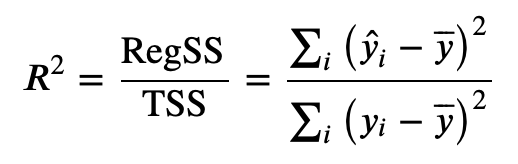
 
​
 
Description: R-squared is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. It ranges from 0 to 1, where 1 indicates that the model explains all the variability of the response data around its mean.

Range: The range of R-squared is from 0 to 1. However, it's possible to have negative values if the model is worse than a horizontal line fitting the data.

Root Mean Squared Error (RMSE):

Formula: 

​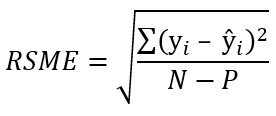
 
Description: RMSE is a measure of the differences between values (sample or population values) predicted by a model and the observed values. It's the square root of the average of the squared differences between prediction and actual observation. RMSE is in the same units as the original data, which makes it easy to interpret.

Range: RMSE has an unbounded range, as it depends on the scale of the data. Lower values of RMSE indicate a better fit between predicted and observed values.

Perfect predictions: would be indicated by an R2 value of 1 and an RMSE value of 0. This means that the model perfectly explains all the variance in the data (R2) and makes predictions that exactly match the observed values (RMSE).

Terrible predictions: would be indicated by an R2 value close to 0 (or negative) and a high RMSE value. A low R2 indicates that the model does not explain much of the variance in the data, while a high RMSE indicates that the model's predictions are far from the actual values. However, what constitutes "terrible" can depend on the specific context and the expectations for the model.

Source benefited: https://click.clarity.io/knowledge/r2-rmse

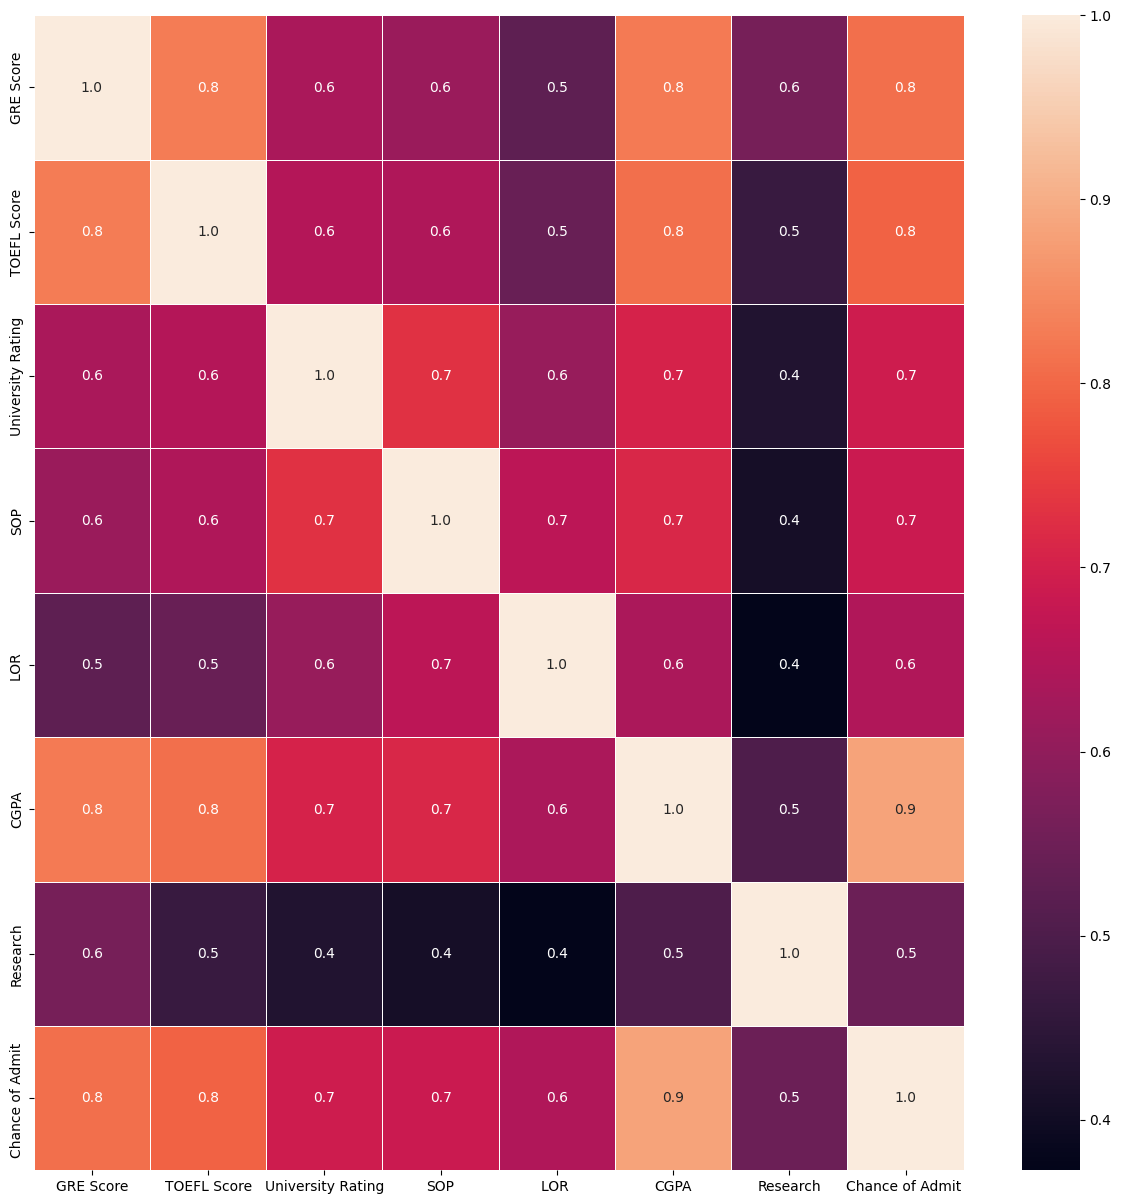

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Read the dataset
dataset = pd.read_csv('admissionv2.csv')
# Explore the dataset
# Observe that the scales and centers are very different which needs to be fixed,
# and the column "Serial No." is actually just the row number so it must be removed.
dataset # To print the dataset (In a jupyter notebook there is no need to use the print command)
dataset.head(10) # Or, you can print only the first 10 lines
dataset.describe() # The basic statistical description of the dataset
# Remove the useless "Serial No."
dataset.drop('Serial No.', axis=1, inplace=True)
# Let's look at the correlations across the columns.
dataset.corr() # Print the correlations
# We can see easier when we draw a correlation heatmap
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(dataset.corr(), annot=True, linewidths=0.5, linecolor="white", fmt= '.1f',ax=ax)
plt.show()

In [9]:
# Let's prepare the dataset for the experimentation
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Separate the targets from the inputs
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,7].values.reshape(-1,1) # Chance of admission
# Convert to numpy arrays
X = np.array(X)
Y = np.array(Y)
# Split the training and validation sets (ensuring the same split always)
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.30,
shuffle=False, random_state=1)
# Preprocessing (by standard normalization since we observed quite different scales/centers)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) # We fit the scaler only on the training set
x_valid = scaler.transform(x_valid) # We use the resulting fit on the validation set (always!)
print(x_train.shape, x_valid.shape)

(350, 7) (150, 7)


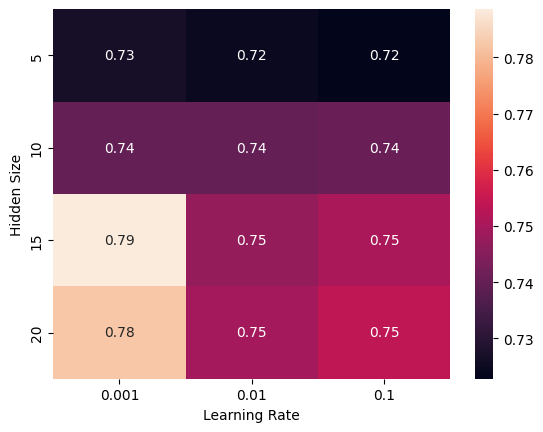

Best R2: 0.8494076323802152
Best Hidden Size: 20
Best Learning Rate: 0.01
Best Momentum: 0.001
Best Lambda: 0.01


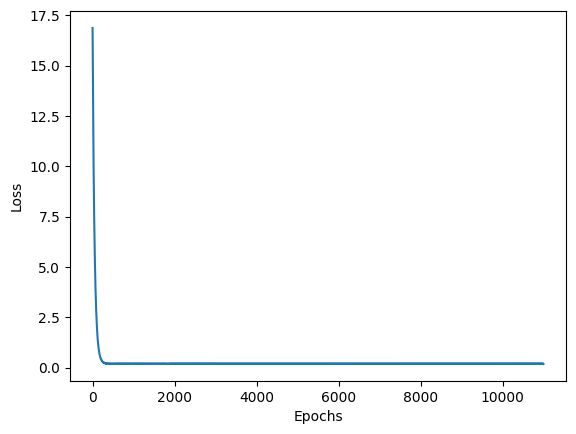

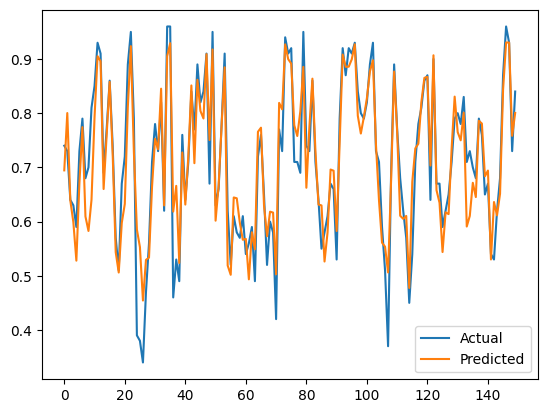

R2 Score: 0.8458888576983397

RMSE: 0.05606101279485491

Accuracy: 0.94


In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math


class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, epochs, learning_rate, momentum, lambda_, batch_size):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))
        self.loss = []
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.lambda_ = lambda_
        self.batch_size = batch_size
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def mse(self, y, y_hat):
        return np.mean((y - y_hat) ** 2)
    
    def l2_regularization(self, lambda_, W1, W2):
        return lambda_ * (np.sum(W1 ** 2) + np.sum(W2 ** 2))
    
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2
    
    def backward(self, X, y, y_hat):
        m = X.shape[0]
        self.loss.append(self.mse(y, y_hat) + self.l2_regularization(self.lambda_, self.W1, self.W2))
        delta2 = (y_hat - y) * self.sigmoid_derivative(y_hat)
        dW2 = np.dot(self.a1.T, delta2)
        db2 = np.sum(delta2, axis=0, keepdims=True)
        delta1 = np.dot(delta2, self.W2.T) * self.sigmoid_derivative(self.a1)
        dW1 = np.dot(X.T, delta1)
        db1 = np.sum(delta1, axis=0)
        self.W1 -= self.learning_rate * (dW1 + self.momentum * self.W1)
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * (dW2 + self.momentum * self.W2)
        self.b2 -= self.learning_rate * db2

    def fit(self, X, y):
        for i in range(self.epochs):
            for j in range(0, X.shape[0], self.batch_size):
                X_batch = X[j:j+self.batch_size]
                y_batch = y[j:j+self.batch_size]
                y_hat = self.forward(X_batch)
                self.backward(X_batch, y_batch, y_hat)

    
    def predict(self, X):
        return self.forward(X)
    
    def plot_loss(self):
        plt.plot(self.loss)
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()

# Hyperparameter tuning
# Hyperparameters
input_size = x_train.shape[1]
output_size = 1
epochs = 1000
batch_size = 32
# Grid search
hidden_sizes = [5, 10, 15, 20]
learning_rates = [0.001, 0.01, 0.1]
momentums = [0.001, 0.01, 0.1]
lambdas = [0.001, 0.01, 0.1]
# Best model
best_model = None
best_r2 = -np.inf
r2s = []
# Grid search
for hidden_size in hidden_sizes:
    for learning_rate in learning_rates:
        for momentum in momentums:
            for lambda_ in lambdas:
                nn = NeuralNetwork(input_size, hidden_size, output_size, epochs, learning_rate, momentum, lambda_, batch_size)
                nn.fit(x_train, y_train)
                y = nn.predict(x_valid)
                r2 = r2_score(y_valid, y)
                if r2 > best_r2:
                    best_r2 = r2
                    best_model = nn
                    best_hidden_size = hidden_size
                    best_learning_rate = learning_rate
                    best_momentum = momentum
                    best_lambda = lambda_
        r2s.append(r2)        

#Heatmap
r2s = np.array(r2s).reshape(len(hidden_sizes), len(learning_rates))
sns.heatmap(r2s, annot=True, xticklabels=learning_rates, yticklabels=hidden_sizes)
plt.xlabel('Learning Rate')
plt.ylabel('Hidden Size')
plt.show()



# Print the best model
print(f'Best R2: {best_r2}')
print(f'Best Hidden Size: {best_hidden_size}')
print(f'Best Learning Rate: {best_learning_rate}')
print(f'Best Momentum: {best_momentum}')
print(f'Best Lambda: {best_lambda}')



# Train the best model
best_model.fit(x_train, y_train)
y = best_model.predict(x_valid)
# Plot the loss
nn.plot_loss()


# Plot the predictions
plt.plot(y_valid, label='Actual')
plt.plot(y, label='Predicted')
plt.legend()
plt.show()

print("R2 Score:",r2_score(y_valid, y))
# Calculate the MSE
print("\nRMSE:",math.sqrt(mean_squared_error(y_valid, y)))

#Calculate Accuracy

def accuracy(y, y_hat):
    return np.sum(y == y_hat) / len(y)
print("\nAccuracy:",accuracy(np.round(y_valid), np.round(y)))
